# Fitting a Decaying Oscillation

In this notebook you will fit a dataset to a non-linear model that has a decaying oscillation.

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

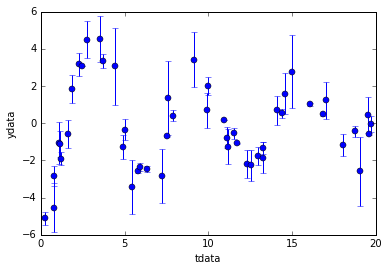

In [9]:
# YOUR CODE HERE
data = np.load('decay_osc.npz')
plt.errorbar(data['tdata'], data['ydata'], yerr=[data['dy'], data['dy']], fmt='o')
plt.xlabel('tdata')
plt.ylabel('ydata')

Now, using `scipy.optimize.curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

A -4.89598761328 0.00399528454131
l 0.0936641482609 8.27227505224e-06
w -1.00111421579 6.62500911934e-07
d 0.0266129841276 0.000202547779795


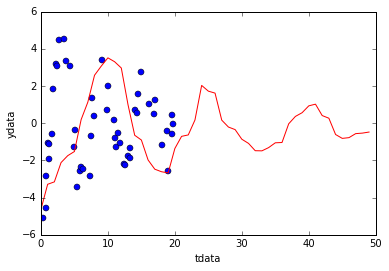

In [14]:
# YOUR CODE HERE
def f(t, A, l, w, d):
    return A * (np.e ** (-1 * l * t)) * np.cos(w * t) + d
popt, pcov = opt.curve_fit(f,data['tdata'], data['ydata'], sigma=data['dy'], absolute_sigma=True)
print('A', popt[0], pcov[0][0])
print('l', popt[1], pcov[1][1])
print('w', popt[2], pcov[2][2])
print('d', popt[3], pcov[3][3])
bestfit = f(data['tdata'], popt[0], popt[1], popt[2], popt[3])
plt.plot(data['tdata'], data['ydata'], 'o', bestfit, 'r-')
plt.xlabel('tdata')
plt.ylabel('ydata')